In [142]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [143]:
img1 = cv.imread('imagenes/huang1.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('imagenes/huang2.jpg',cv.IMREAD_GRAYSCALE)
img3 = cv.imread('imagenes/huang3.jpg',cv.IMREAD_GRAYSCALE)

In [144]:
n=7
mask_box = np.ones((n,n),np.float32)/(n*n)
mask_cross = np.zeros((n,n),np.float32)
mask_cross[n//2,:] = 1
mask_cross[:,n//2] = 1
mask_cross = mask_cross/(n+(n-1))

plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 640x480 with 0 Axes>

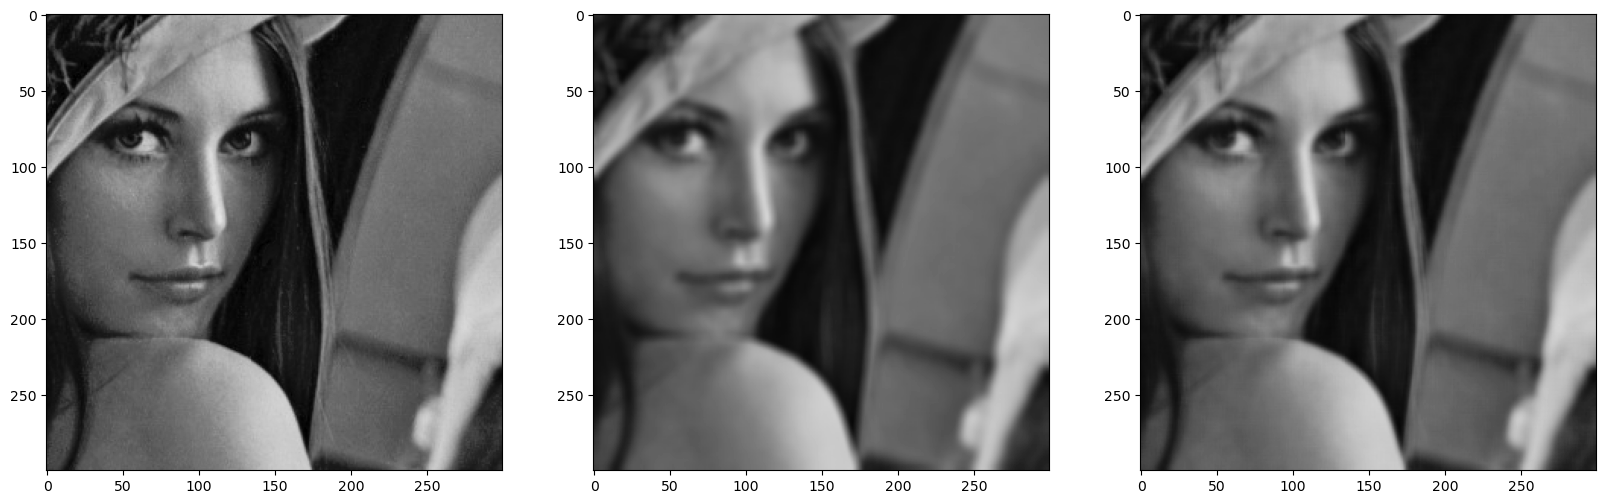

In [145]:
dst_box = cv.filter2D(img1,-1,mask_box)
dst_cross = cv.filter2D(img1,-1,mask_cross)
plt.figure(1)
fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(dst_box,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(dst_cross,cmap="gray",vmin=0,vmax=255)


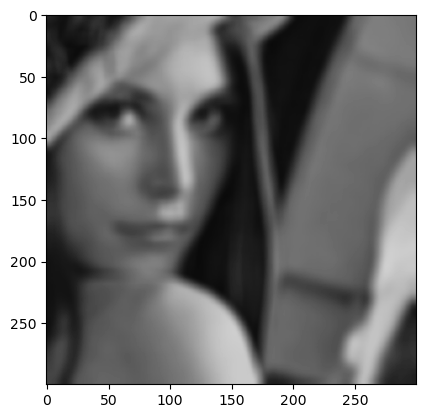

In [146]:
dst = cv.GaussianBlur(img1, (11,11),9)
plt.imshow(dst,cmap="gray",vmin=0,vmax=255)
plt.show()

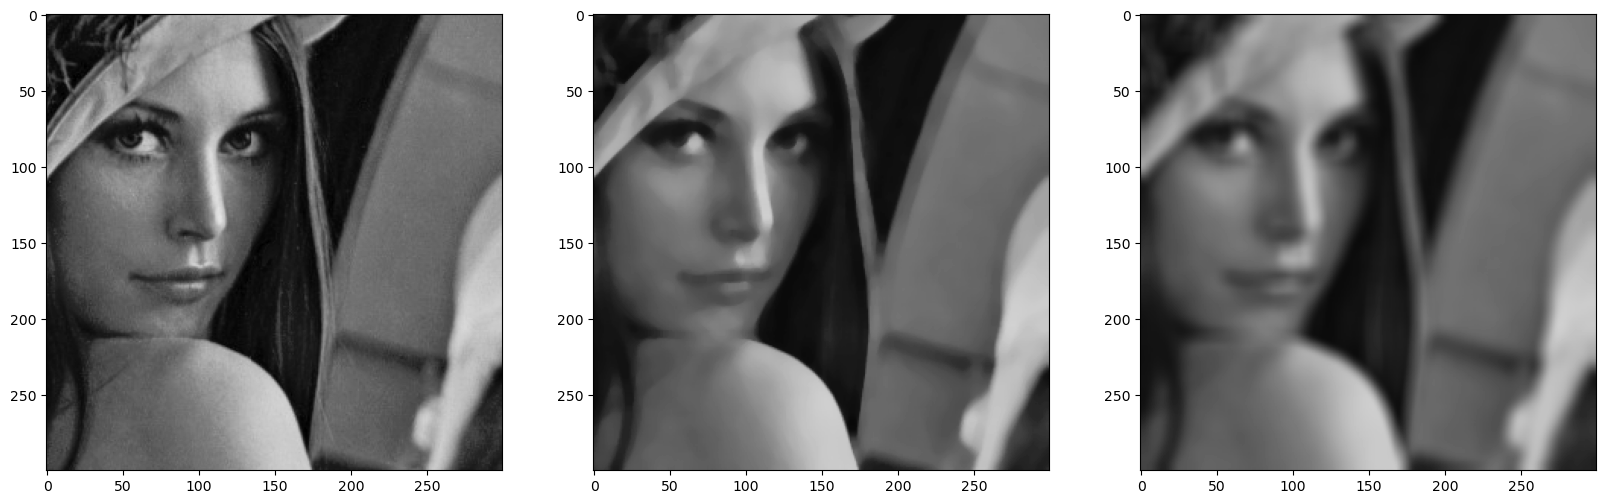

In [147]:
img_med = cv.medianBlur(img1,9)

fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(img_med,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(dst,cmap="gray",vmin=0,vmax=255)
plt.show()


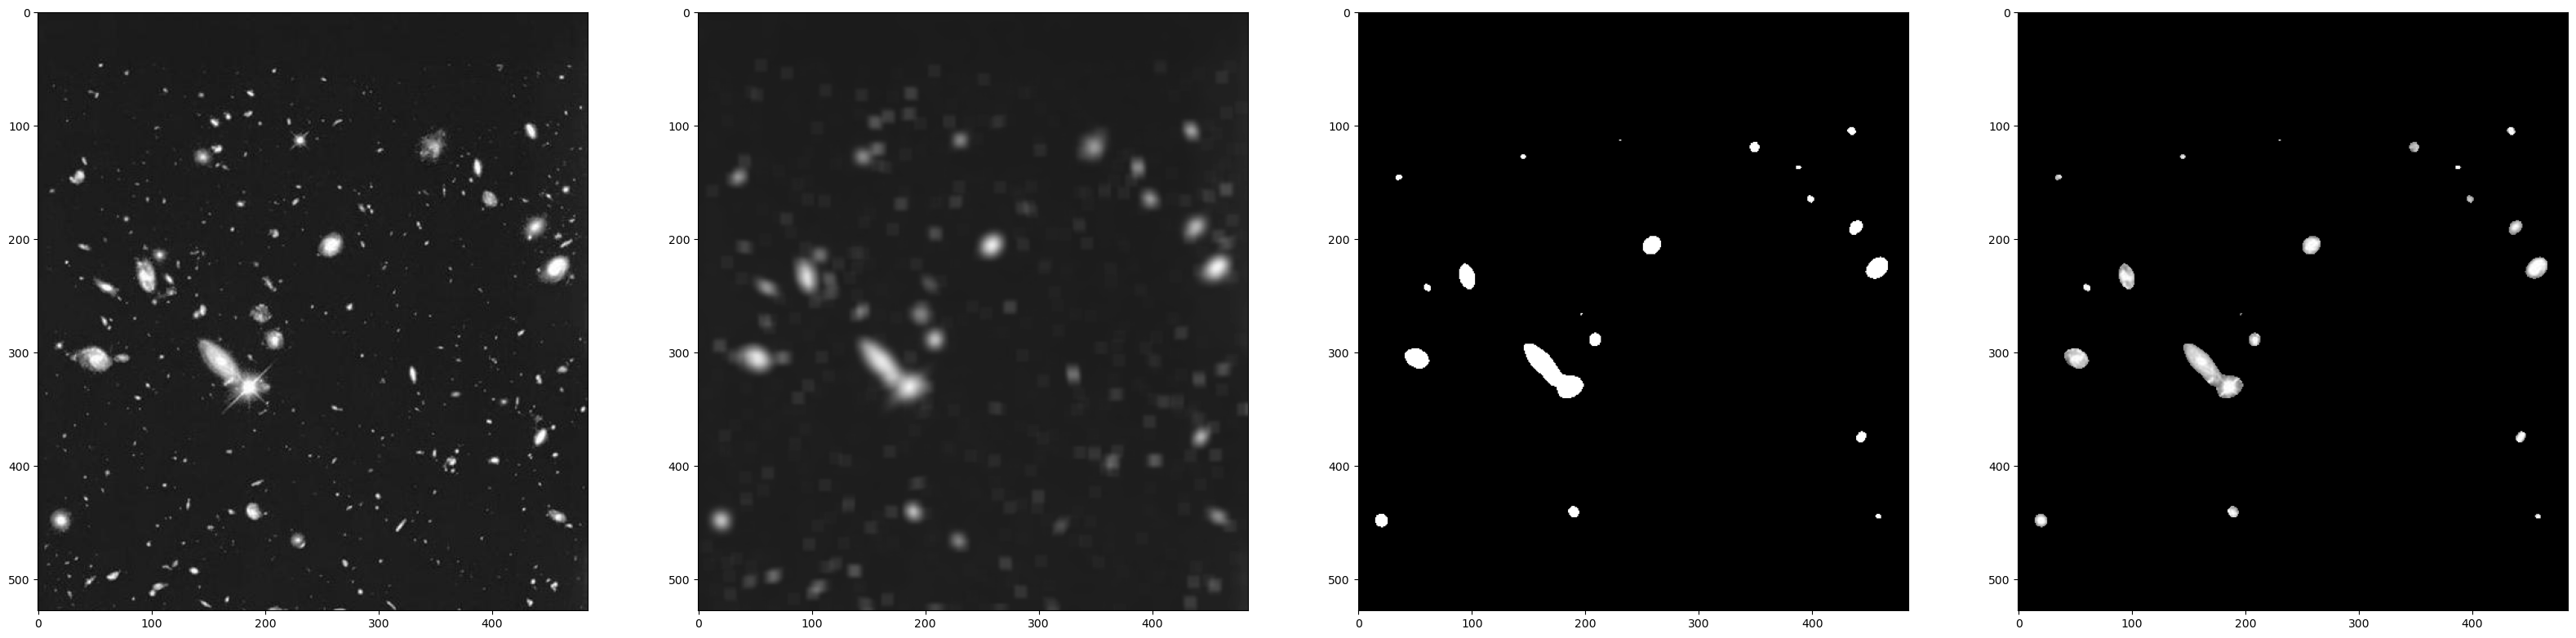

In [148]:
hubble = cv.imread("imagenes/hubble.tif",cv.IMREAD_GRAYSCALE)
hubble_filter = cv.boxFilter(hubble,-1,(11,11))
hubble_binary = cv.threshold(hubble_filter,127,255,cv.THRESH_BINARY)[1]
hubble_b2 = np.where(hubble_binary==255,1,0)

fig,ax = plt.subplots(1,4,figsize=(40,40))
ax[0].imshow(hubble,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(hubble_filter,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(hubble_binary,cmap="gray",vmin=0,vmax=255)
ax[3].imshow(hubble_b2*hubble,cmap="gray",vmin=0,vmax=255)
plt.show()



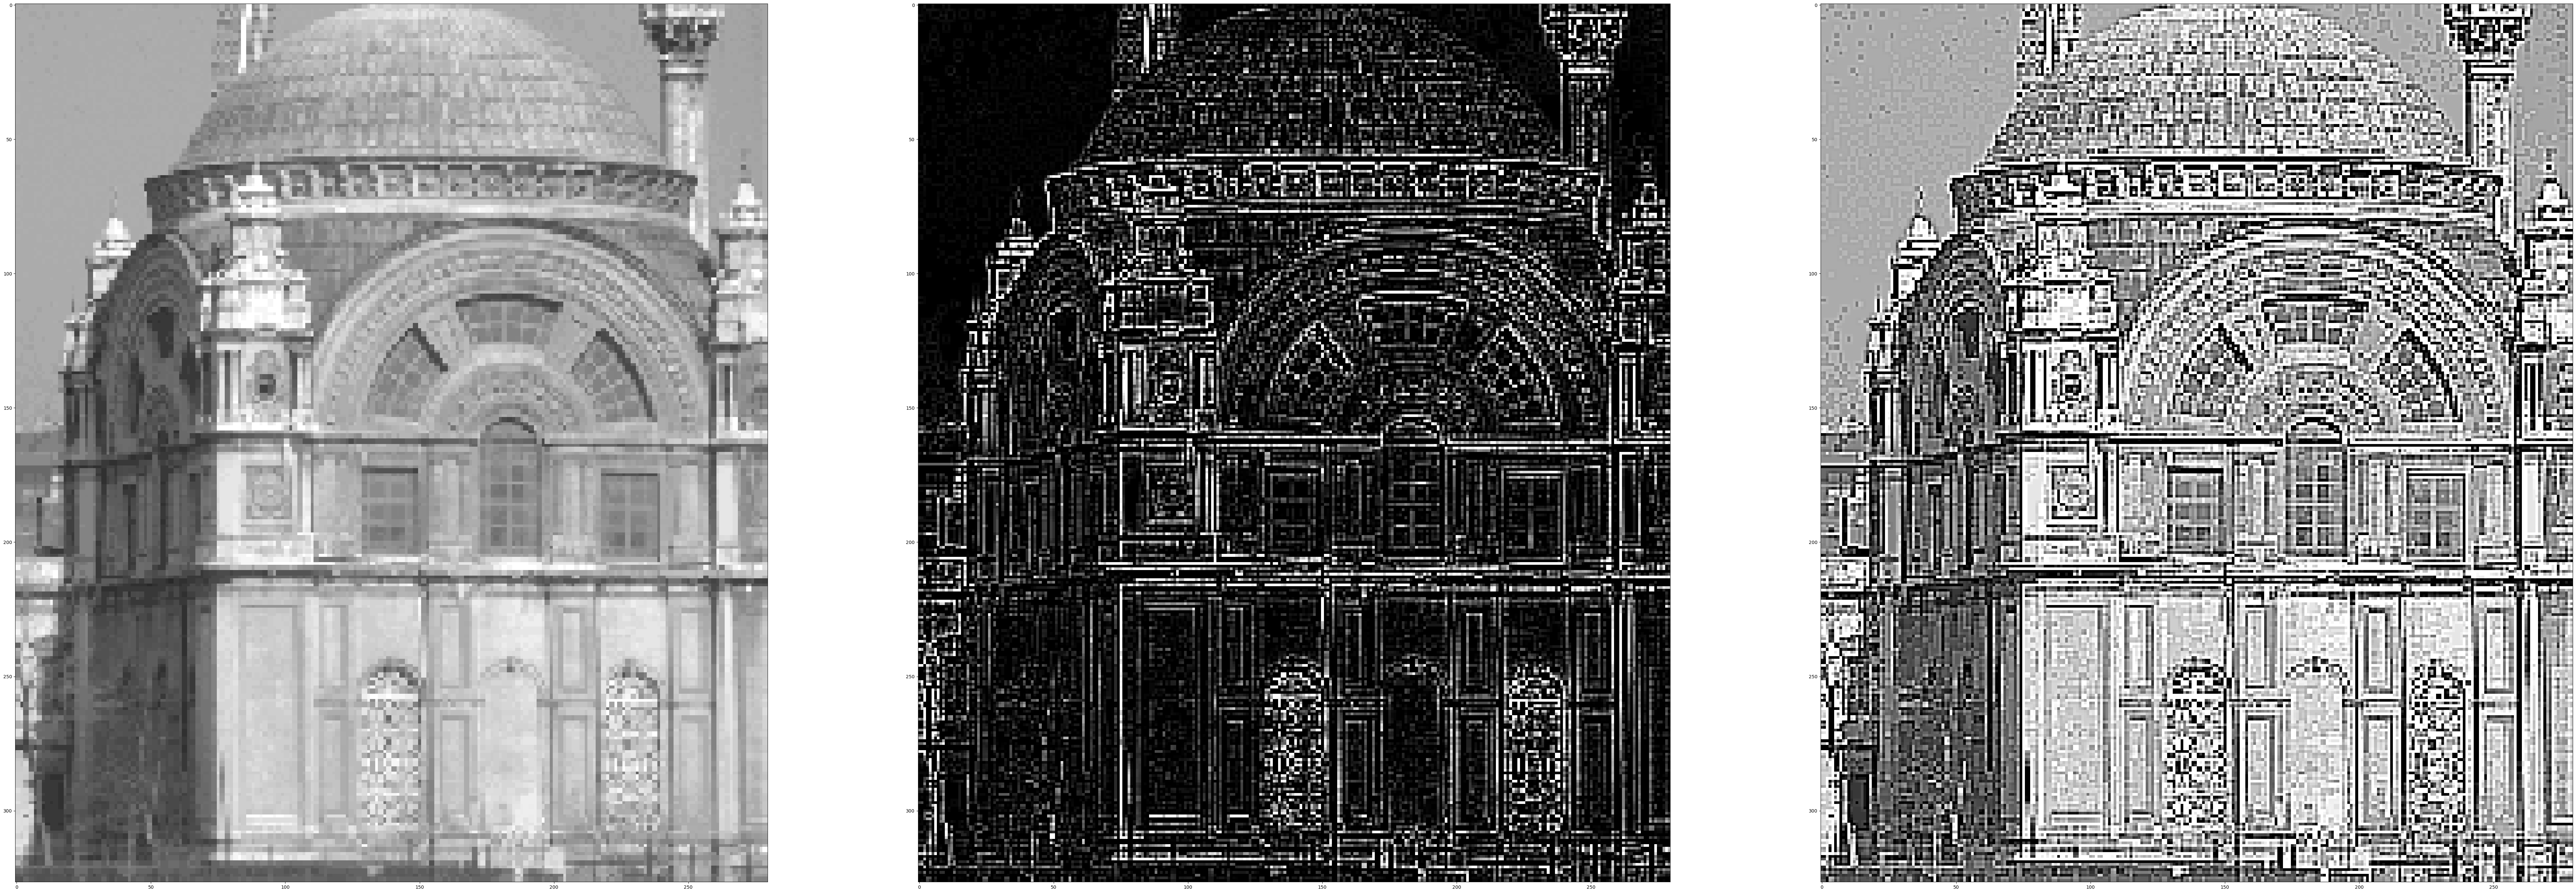

In [160]:
silla = cv.imread("imagenes/estanbul.tif",cv.IMREAD_GRAYSCALE)

filter_sum0 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
filter_sum1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

silla_0 = cv.filter2D(silla,-1,filter_sum0)
silla_1 = cv.filter2D(silla,-1,filter_sum1)

fig,ax = plt.subplots(1,3,figsize=(100,100))
ax[0].imshow(silla,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(silla_0,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(silla_1,cmap="gray",vmin=0,vmax=255)
plt.show()